Stock prediction model using LSTM.

> Made by: Garv Saxena

> For SWOC S3

In [ ]:
#Updating the modules (otherwise error message in fetching dataset from yahoo)
!pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.2 MB 6.8 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [ ]:
pip install pycryptodome pycryptodomex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 6.2 MB/s 
     |████████████████████████████████| 2.3 MB 67.0 MB/s 


In [ ]:
pip uninstall --yes pandas-datareader

Found existing installation: pandas-datareader 0.9.0
Uninstalling pandas-datareader-0.9.0:
  Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
pip install git+https://github.com/raphi6/pandas-datareader.git@ea66d6b981554f9d0262038aef2106dda7138316
#Restart the Runtime after installing this

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/raphi6/pandas-datareader.git (to revision ea66d6b981554f9d0262038aef2106dda7138316) to /tmp/pip-req-build-0cdxfbu1
  Running command git clone -q https://github.com/raphi6/pandas-datareader.git /tmp/pip-req-build-0cdxfbu1
  Running command git rev-parse -q --verify 'sha^ea66d6b981554f9d0262038aef2106dda7138316'
  Running command git fetch -q https://github.com/raphi6/pandas-datareader.git ea66d6b981554f9d0262038aef2106dda7138316
  Running command git checkout -q ea66d6b981554f9d0262038aef2106dda7138316


In [ ]:
#Updating the modules (otherwise error message in fetching dataset from yahoo)
#!pip install --upgrade pandas-datareader

In [ ]:
#Importing libraries
import pandas_datareader as dr
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt

#2138 is training size
#549 is testing size

In [ ]:
#building dataframe for tata motors stock from yahoo finance
df = dr.DataReader('TTM',data_source = 'yahoo',start = '2012-01-01',end='2022-12-31')
df.head

<bound method NDFrame.head of                  High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2012-01-03  18.320000  17.820000  17.820000  18.110001  1919900.0  17.598066
2012-01-04  19.000000  18.440001  18.440001  18.790001  2907600.0  18.258844
2012-01-05  19.180000  18.700001  18.790001  19.100000  1765300.0  18.560083
2012-01-06  19.180000  18.889999  19.080000  19.049999  1877900.0  18.511492
2012-01-09  19.150000  18.760000  18.820000  19.129999  1216100.0  18.589231
...               ...        ...        ...        ...        ...        ...
2022-12-22  23.400000  22.370001  23.260000  22.860001  1218100.0  22.860001
2022-12-23  22.410000  22.059999  22.250000  22.350000   969400.0  22.350000
2022-12-27  23.389999  23.160000  23.209999  23.260000  1349700.0  23.260000
2022-12-28  23.590000  23.209999  23.209999  23.309999   951400.0  23.309999
2022-12-29  23.379999  23.040001  23.150000  2

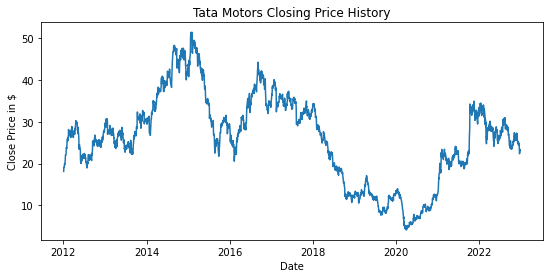

In [ ]:
#Ploting tata stock price (Just for Fun)
plt.figure(figsize=(9,4))
plt.title("Tata Motors Closing Price History")
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=10)
plt.ylabel('Close Price in $')
plt.show()

In [ ]:
#Filtering only required column "Here we only considering Close stock price" From DataFrame
data = df.filter(['Close'])


In [ ]:
#Converting data frame to NumPy array And calculating 80% data length for training data length
dataset = data.values
train_data_len = round(len(dataset) * 0.8)

In [ ]:
#Scaling the training data between 0 to 1 for our LSTM model
train_data  = dataset[0:train_data_len,:] #Taking 80% of total dataset for training

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data_train = scaler.fit_transform(train_data) #Scaling training data

In [ ]:
#Appending the past 60s days closing values to x_train(Inputs) and appending 61th Closing value to y_train(Output)
x_train = [] #inputs past 60 days closing values
y_train = [] #output 61th day closing value
for i in range(60, train_data_len):
  x_train.append(scaled_data_train[i-60:i,0])
  y_train.append(scaled_data_train[i,0])

In [ ]:
#Converting list to NumPy array
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train = x_train.reshape(len(x_train),60,1)

In [ ]:
#Building LSTM Model and layers
model = Sequential()
model.add(LSTM(60,return_sequences=True, input_shape = (60, 1)))
#model.add(Dropout(0.5))
model.add(LSTM(31))
model.add(Dense(1))
#print(model.summary())

In [ ]:
#Compling and Fit the model
model.compile(optimizer="Nadam", loss='mean_squared_error')
model.fit(x_train,y_train, batch_size=5, epochs=5)

Epoch 1/5
431/431 [==============================] - 64s 44ms/step - loss: 7.2976e-04
Epoch 2/5
431/431 [==============================] - 19s 44ms/step - loss: 4.4634e-04
Epoch 3/5
431/431 [==============================] - 24s 55ms/step - loss: 3.4788e-04
Epoch 4/5
431/431 [==============================] - 19s 44ms/step - loss: 2.8921e-04
Epoch 5/5
431/431 [==============================] - 19s 44ms/step - loss: 2.6560e-04


In [ ]:
#Appending the past 60s days closing values to x_test(Test Inputs)
test_data = dataset[train_data_len - 60: , :]
test_data = scaler.fit_transform(test_data)
x_test = []
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

#Storing Actual Closing values to y_test
y_test = dataset[train_data_len:, :]

In [ ]:
#Converting x_test to NumPy array and reshape it
x_test = np.array(x_test)
x_test = x_test.reshape(len(x_test),60,1)

In [ ]:
#Predicting the closing value till original dataset
pred = model.predict(x_test)
pred_inverse = scaler.inverse_transform(pred)

18/18 [==============================] - 1s 16ms/step


In [ ]:
#Predicting Future 5 Days Values

#Predicting +1 Day from last day of dataset
x_test_59_1 = x_test[len(x_test)-1][1:60]
x_test_59_1 = np.append(x_test_59_1, [pred[len(pred)-1]], axis=0)
x_test_59_1 = x_test_59_1.reshape(1,60,1)
predp = model.predict(x_test_59_1)

#Predicting +2 Day from last day of dataset
x_test_59_2 = x_test_59_1[0][1:60]
x_test_59_2 = np.append(x_test_59_2, [predp[len(predp)-1]], axis=0)
x_test_59_2 = x_test_59_2.reshape(1,60,1)
predpp = model.predict(x_test_59_2)

#Predicting +3 Day from last day of dataset
x_test_59_3 = x_test_59_2[0][1:60]
x_test_59_3 = np.append(x_test_59_3, [predpp[len(predpp)-1]], axis=0)
x_test_59_3 = x_test_59_3.reshape(1,60,1)
predppp = model.predict(x_test_59_3)

#Predicting +4 Day from last day of dataset
x_test_59_4 = x_test_59_3[0][1:60]
x_test_59_4 = np.append(x_test_59_4, [predppp[len(predppp)-1]], axis=0)
x_test_59_4 = x_test_59_4.reshape(1,60,1)
predpppp = model.predict(x_test_59_4)

#Predicting +5 Day from last day of dataset
x_test_59_5 = x_test_59_4[0][1:60]
x_test_59_5 = np.append(x_test_59_5, [predpppp[len(predpppp)-1]], axis=0)
x_test_59_5 = x_test_59_5.reshape(1,60,1)
predppppp = model.predict(x_test_59_5)

print('+1')
print(scaler.inverse_transform(predp))
print('+2')
print(scaler.inverse_transform(predpp))
print('+3')
print(scaler.inverse_transform(predppp)) #Converting back to original value 
print('+4')
print(scaler.inverse_transform(predpppp))
print('+5')
print(scaler.inverse_transform(predppppp))


1/1 [==============================] - 0s 47ms/step
+1
[[22.759594]]
+2
[[22.801794]]
+3
[[22.723442]]
+4
[[22.613783]]
+5
[[22.536537]]


In [ ]:
#Calculating Root Mean Square Error 
rmse=np.sqrt(np.mean(((pred_inverse - y_test)**2)))
rmse 
#Last Best:- 0.9894429065605955

1.1479033167210901

In [ ]:
rmspe = np.sqrt(np.mean(np.square(((y_test - pred_inverse) / y_test)), axis=0))
rmspe

array([0.03966288])

In [ ]:
#Adding Actual and Predicted values of closing price in valid NumPy array
train = data[:train_data_len]
valid = data[train_data_len:]
valid['pred'] = pred_inverse
valid

<ipython-input-58-f845359b1653>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['pred'] = pred_inverse


,Close,pred
Date,,
2020-10-20,8.920000,8.970093
2020-10-21,8.840000,8.890950
2020-10-22,9.120000,8.856079
2020-10-23,9.320000,8.872856
2020-10-26,9.060000,8.941902
...,...,...
2022-12-22,22.860001,24.377186
2022-12-23,22.350000,23.843910
2022-12-27,23.260000,23.010824


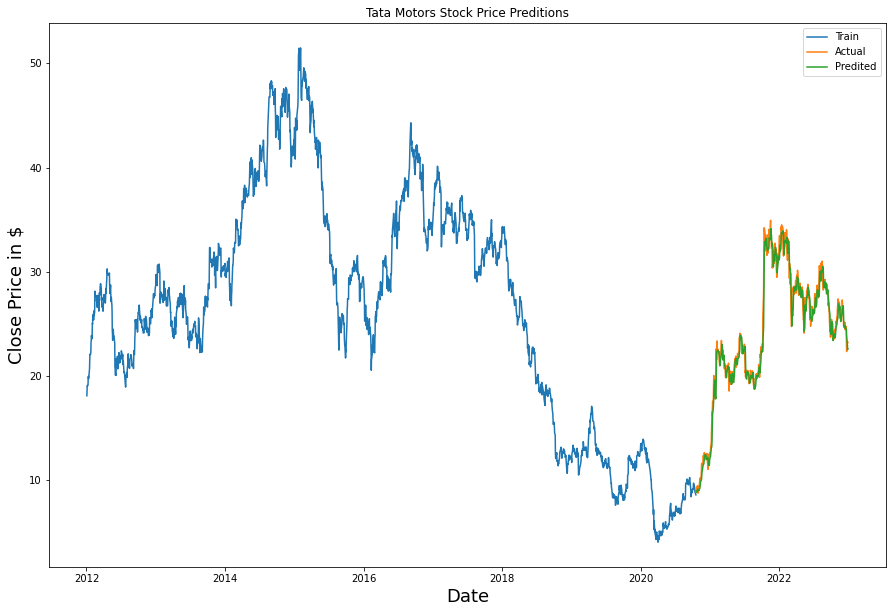

In [ ]:
#Ploting the Graph for training data + Predicted data + Actual Data
plt.figure(figsize=(15,10))
plt.title("Tata Motors Stock Price Preditions")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Close Price in $",fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'pred']])
plt.legend(['Train','Actual','Predited'])
plt.show()